<a href="https://colab.research.google.com/github/YenLinWu/Python_for_NCCU_Accounting/blob/main/20210602/Neural_Style_Transfer_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Import Packages
from google.colab import files
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from matplotlib import pyplot as plt 
import time

print( 'NumPy version:', np.__version__ )
print( 'TensorFlow version:', tf.__version__, '\n' )
!/opt/bin/nvidia-smi

NumPy version: 1.19.5
TensorFlow version: 2.5.0 

Sun May 30 11:40:55 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                      

Saving Edvard_Munch - The_Scream.jpg to Edvard_Munch - The_Scream.jpg


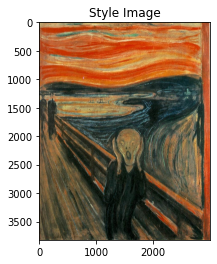

In [ ]:
#@title Upload Style Image
uploaded = files.upload()
style_image_path = next(iter(uploaded))

plt.imshow(plt.imread(style_image_path))
plt.title('Style Image')
plt.show()

Saving Kaohsiung_Taiwan - Kaohsiung_Exhibition_Center.jpg to Kaohsiung_Taiwan - Kaohsiung_Exhibition_Center.jpg


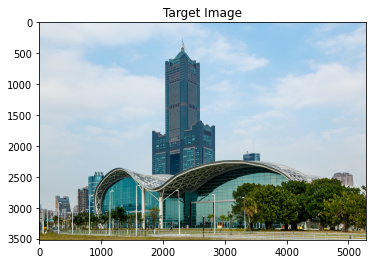

In [ ]:
#@title Upload Target Image
uploaded = files.upload()
target_image_path = next(iter(uploaded))

plt.imshow( plt.imread(target_image_path) )
plt.title('Target Image')
plt.show()

Total time: 1.2


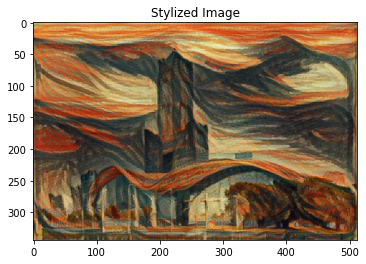

In [ ]:
#@title Neural Style Transfer  
#@markdown - resize_max_dim (int) : Optionally resize the target images.
resize_max_dim =  "512"#@param [0,128,256,512,1024]

# Load target and style images (see example in the attached colab).
target_image = plt.imread(target_image_path)
style_image = plt.imread(style_image_path)

# Convert to float32 numpy array, add batch dimension, and normalize to range [0, 1]. Example using numpy:
target_image = target_image.astype(np.float32)[np.newaxis, ...] / 255.
style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.

# Optionally resize the images. It is recommended that the style image is about
# 256 pixels (this size was used when training the style transfer network).
# The target image can be any size.
style_image = tf.image.resize(style_image, (256,256))

# Optionally resize the target images.
if int(resize_max_dim) > 0 : 
    long_dim = max(target_image.shape[1:3])
    scale = int(resize_max_dim) / long_dim
    new_size = tf.cast(np.array(target_image.shape[1:3])*scale, tf.int32).numpy()
    target_image = tf.image.resize(target_image, tuple(new_size))

# Load image stylization module.
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Stylize image.
start = time.time()
outputs = hub_module(tf.constant(target_image), tf.constant(style_image))
stylized_image = outputs[0]
end = time.time()
print( 'Total time: {:.1f}'.format(end-start) )

# Show stylized image
plt.imshow( tf.squeeze(stylized_image, axis=0) )
plt.title('Stylized Image')
plt.show()

In [ ]:
#@title Save Stylized Image 
output_file_name = 'Stylized_Kaohsiung_Exhibition_Center' #@param {type:"string"}

import matplotlib
matplotlib.image.imsave(output_file_name+'.jpg', tf.squeeze(stylized_image,axis=0).numpy())
files.download( output_file_name+'.jpg' ) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>